In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import unique
import json
from pandas.io.json import json_normalize
import seaborn as sns

In [60]:
sd = pd.read_csv('SpDat.csv')
goo = 'exphappy'
sd= sd[goo]
sd= pd.DataFrame(sd)
sd[goo] = pd.Categorical(sd[goo])
sd= pd.DataFrame(sd)
sd['codes'] = sd[goo].cat.codes

fig= plt.figure()
ax1= fig.add_subplot(2,2,1)
ax1.hist(sd['codes'],bins=270)
plt.xlabel('code')
plt.ylabel('Number of People')

,met,dec_o
count,8003.000000,8003.000000
mean,0.948769,0.424966
std,0.989889,0.494369
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,1.000000
max,8.000000,1.000000


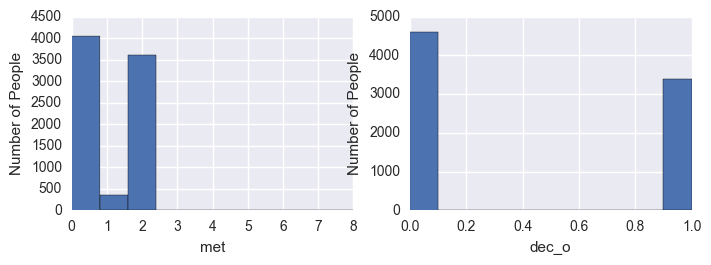

In [87]:
sd = pd.read_csv('SpDat.csv')
goo = 'met'
gob = 'dec_o'
sd= sd[[goo,gob]].dropna()
sd= pd.DataFrame(sd)

fig= plt.figure()
ax1= fig.add_subplot(2,2,1)
ax1.hist(sd[goo])
plt.xlabel(goo)
plt.ylabel('Number of People')


ax2= fig.add_subplot(2,2,2)
ax2.hist(sd[gob])
plt.xlabel(gob)
plt.ylabel('Number of People')

sd.describe()

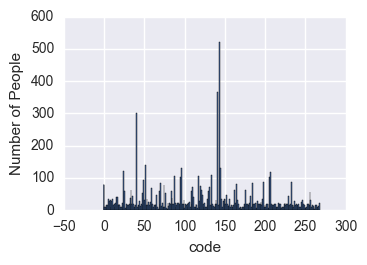

In [3]:
#make income a float
incomefloat =  sd['income']
listy= []
for a in incomefloat:
    hey = str(a).replace(',','')
    hey= float(hey)
    listy.append(hey)
sd['income'] = listy
sd['incomerange'] = sd['income'] // 20000 * 20000
sd['incomerange']

0       60000.0
1       60000.0
2       60000.0
3       60000.0
4       60000.0
5       60000.0
6       60000.0
7       60000.0
8       60000.0
9       60000.0
10      60000.0
11      60000.0
12      60000.0
13      60000.0
14      60000.0
15      60000.0
16      60000.0
17      60000.0
18      60000.0
19      60000.0
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
8348    40000.0
8349    40000.0
8350    40000.0
8351    40000.0
8352    40000.0
8353    40000.0
8354    40000.0
8355    40000.0
8356        NaN
8357        NaN
8358        NaN
8359        NaN
8360        NaN
8361        NaN
8362        NaN
8363        NaN
8364        NaN
8365        NaN
8366        NaN
8367        NaN
8368        NaN
8369        NaN
8370        NaN
8371        NaN
8372        NaN
8373        NaN
8374        NaN
8375        NaN
8376        NaN
8377        NaN
Name: incomerange, dtype

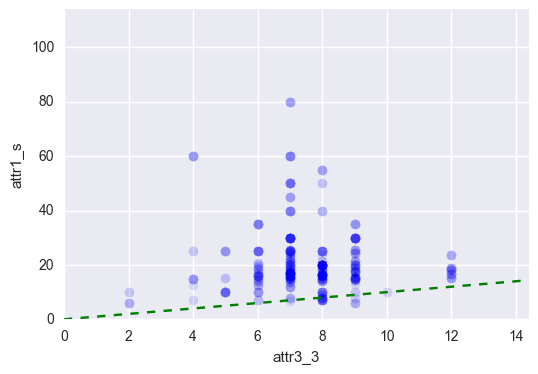

In [5]:
var1 = 'attr3_3'
var2 = 'attr1_s'
x= sd[var1]
y = sd[var2]
plt.figure(1,figsize=(6,4))
ax = plt.subplot(1,1,1)
ax.plot(x,y,'bo',alpha=0.02)

ax.axis([0,x.max()*1.2,0,y.max()*1.2])
plt.xlabel(var1)
plt.ylabel(var2)

linex = np.arange(0,100)
liney = linex
ax.plot(linex,liney,'g--')

In [6]:
vary = 'go_out'
x= sd[vary]
x= pd.DataFrame(x)
pd.DataFrame(x.groupby(vary).size()).sort_values(0,ascending=False).head()

,0
go_out,
2.0,2990
1.0,2610
3.0,1949
4.0,450
5.0,164


In [7]:
variable ='incomerange'

matches = sd[(sd['match']==1)]
match = pd.DataFrame(matches.groupby(variable).size()).sort_values(0,ascending=False)
match = match.reset_index()

no_matches = sd[(sd['match']==0)]
no_match = pd.DataFrame(no_matches.groupby(variable).size()).sort_values(0,ascending=False)
no_match = no_match.reset_index()

datesaidyes = sd[sd['dec_o']==1]
saidyes = pd.DataFrame(datesaidyes.groupby(variable).size()).sort_values(0,ascending=False)
saidyes = saidyes.reset_index()

datesaidno = sd[sd['dec_o']==0]
saidno = pd.DataFrame(datesaidno.groupby(variable).size()).sort_values(0,ascending=False)
saidno = saidno.reset_index()



df = pd.merge(match,no_match,on=variable)
df= pd.merge(df,saidyes,on=variable)
df= pd.merge(df,saidno,on=variable)
df.columns= [variable,'matches','nomatches','datematches','datenomatches']
df['match %']= df['matches']/(df['nomatches']+ df['matches'])
df['matchedwith %']=df['datematches']/(df['datenomatches']+df['datematches'])
df = df.sort_values('matchedwith %',ascending=False)
df.head(10)

,incomerange,matches,nomatches,datematches,datenomatches,match %,matchedwith %
3,80000.0,28,129,77,80,0.178344,0.490446
2,60000.0,118,395,250,263,0.230019,0.487329
4,0.0,27,151,82,96,0.151685,0.460674
0,40000.0,298,1493,818,973,0.166387,0.456728
1,20000.0,265,1351,688,928,0.163985,0.425743


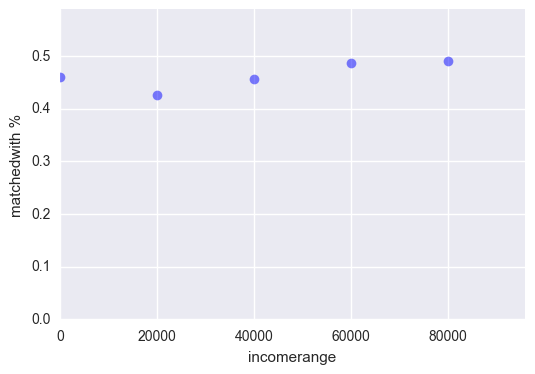

In [8]:
plt.figure(1,figsize=(6,4))
ax = plt.subplot(1,1,1)
x= df[variable]
y= df['matchedwith %']
ax.plot(x,y,'bo',alpha=.5)
ax.axis([0,x.max()*1.2,0,y.max()*1.2])
plt.xlabel(variable)
plt.ylabel('matchedwith %')

In [16]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

In [26]:
variable = 'imprace'
data = sd.drop(variable,axis=1)
data2 = pd.Series(data.dtypes) 
colums = []
r_sq = []
coef = []
for a in data.columns:
    if data2[a] == 'int64' or data2[a] == 'float64':
        X = sd[[a,variable]]
        X = X.dropna()
        Y = X[variable]
        X = X.drop(variable,axis=1)
        if int(X.count()) > 0:
            lm.fit(X,Y)
            score = lm.score(X,Y)
            coeff = float(lm.coef_)
            r_sq.append(score)
            coef.append(coeff)
            colums.append(a)
thedata = pd.DataFrame({
        'variable': colums,
        'r_squared': r_sq,
        'coefficients': coef,
        })

cols = thedata.columns.tolist()
cols = cols[2],cols[1],cols[0]
cols = list(cols)
thedata= thedata[cols]
thedata = thedata.sort_values('r_squared',ascending=False)
thedata['r_squared']= thedata['r_squared'].map('{:.2%}'.format)
thedata.reset_index(drop=True)

,variable,r_squared,coefficients
0,imprelig,18.51%,0.436491
1,tv,8.16%,0.321471
2,fun5_3,7.23%,0.478901
3,sinc5_3,4.58%,0.423712
4,amb5_3,4.51%,0.368018
5,amb3_3,4.04%,0.301682
6,numdat_3,4.03%,-0.460727
7,shar2_3,3.65%,0.081104
8,attr5_3,3.44%,0.366451
9,date_3,3.34%,-1.107136


In [9]:
lm.fit(X,Y)
pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['variable','coefficient']).sort_values('coefficient')

NameError: name 'lm' is not defined

In [12]:
X = sd[['attr5_3','dec_o']]
X = X.dropna()
Y = X['dec_o']
X = X.drop('dec_o',axis=1)
lm.fit(X,Y)
pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['variable','coefficient']).sort_values('coefficient')

,variable,coefficient
0,attr5_3,0.037827


In [13]:
int(X.count())

2016